### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data set

In [2]:
df=pd.read_csv('D:\data sets\Recruitment_Data.csv')

In [3]:
df.head(20)

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online
5,1,3,0.548123,Referral
6,1,3,0.794213,Applied Online
7,0,2,1.006524,Referral
8,0,3,1.519917,Campus
9,0,3,2.073528,NaN


In [4]:
df.shape

(446, 4)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   241 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.1+ KB


Text(0.5, 1.0, 'Recruiting source')

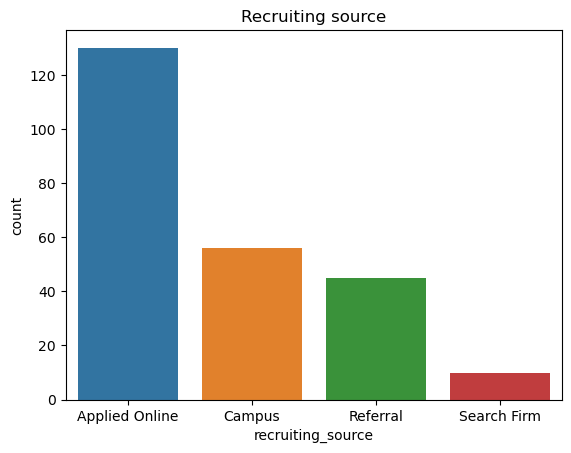

In [4]:
sns.countplot(x=df['recruiting_source'])
plt .title("Recruiting source")

### check the null values

In [6]:
df.isnull().sum()

attrition               0
performance_rating      0
sales_quota_pct         0
recruiting_source     205
dtype: int64

In [7]:
round(100*(df.isnull().sum()/len(df)),2)

attrition              0.00
performance_rating     0.00
sales_quota_pct        0.00
recruiting_source     45.96
dtype: float64

### Impute null value with "other" 

In [5]:
df['recruiting_source']=df['recruiting_source'].fillna('others')

In [15]:
round(100*(df.isnull().sum()/len(df)),2)

attrition             0.0
performance_rating    0.0
sales_quota_pct       0.0
recruiting_source     0.0
dtype: float64

### Till here our data is clean

### Check the count plot for "recruiting_source"

Text(0.5, 1.0, 'Recruting source')

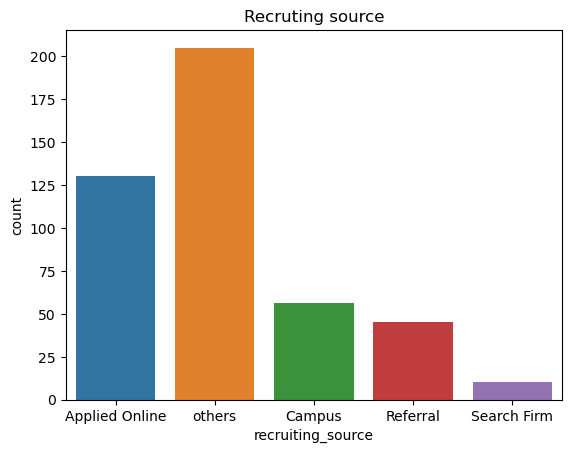

In [6]:
sns.countplot(x=df['recruiting_source'])
plt.title("Recruting source")

#### As we see in this graph recruitment through Referral,campus and search firm are very less in count as compare to other sources

In [9]:
grp=df.groupby(['recruiting_source'])['sales_quota_pct'].mean().reset_index(name='Average_sales_rating')
grp

,recruiting_source,Average_sales_rating
0,Applied Online,1.058590
1,Campus,0.908035
2,Referral,1.023198
3,Search Firm,0.886960
4,others,1.168109


#### the average  sales_quota of campus and search firm has  also  low value as compare to other sources

Text(0.5, 1.0, 'Average sale_rating w.r.t Recruiting_sources')

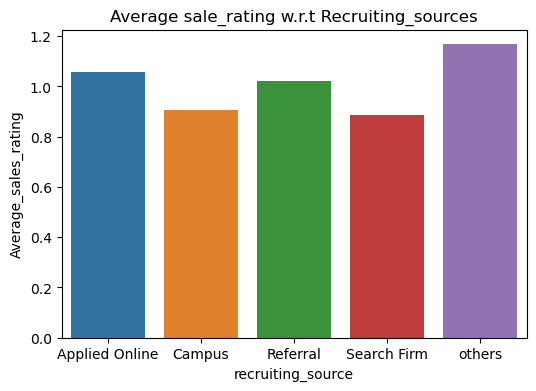

In [21]:
plt.figure(figsize=(6,4))
sns.barplot(data=grp,x='recruiting_source',y='Average_sales_rating')
plt.title("Average sale_rating w.r.t Recruiting_sources")


### Inference:
Sales_quota_pct:  represent the performance or achievement  of the employees  by the end of month.
In our data set we clearly see that mean of  sales performance of each employees w.r.t recruiting sources.
As we see that sales quota for  employees recruiting from applied online ,Referral and from other sources are high as compare to Campus and Search firm.

In [12]:
grp2=df.groupby(['recruiting_source'])['attrition'].mean().reset_index(name="attrition_rate")
grp2

,recruiting_source,attrition_rate
0,Applied Online,0.246154
1,Campus,0.285714
2,Referral,0.333333
3,Search Firm,0.500000
4,others,0.131707


#### The average attrition of Search Firm is very high as compare to other 


Text(0.5, 1.0, 'Attrition rate w.r.t Recruiting_sources')

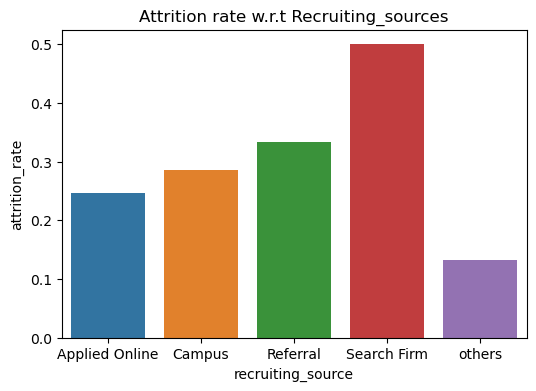

In [22]:
plt.figure(figsize=(6,4))
sns.barplot(data=grp2,x='recruiting_source',y='attrition_rate')
plt.title("Attrition rate w.r.t Recruiting_sources")

### Inference:
Attrition: Attrition rate represent the rate at which employees leaving the company.
In our data set we clearly see that mean of  Attrition rate of each employees w.r.t recruiting sources. As we see that Attrition rate  for employees recruiting from applied online , campus,Referral and from other sources are low as compare to Search firm.

### Conclusion:


#### Applied online:
sales_quota rate is high  and attrition rate is low.Which means applied online sources gives positive result.

#### Campus:
sales_quota rate is high and attrition rate is low .Which also means Campus sources gives positive result.

#### Other :  
sales_quota rate is high and attrition rate is low .Which also means other sources gives positive result.

#### Search firm: 
sales_quota rate is low  and attrition rate is high .Which  means search firm sources puts negative
impact on the organisation reputation.

#### Referral: 
sales_quota rate is good but  attrition rate is very high  .Which  means that employees coming from referral 
sources did his job very well but they didnot stay for long time.